# Exploring the Python NBA_API package

## Play by Play
This notebook is to test out the nba_api package functionality and the data that can be gathered via the endpoints. The example notebooks on the github for this package show that we can get anything from career stats of players, specific game data, play by play data, and more. For game and play by play data, these endpoints can return lots of data so we'll need to be mindful of passing in parameters and asking specific questions rather than general ones.

The goals for this notebook:

1. Get data for the Golden State Warriors (the best team ever) during their dynasty run from 2015-2019
2. Drill into some play by play data in the playoffs (does require regex and "player action events" mapping)
3. See if we can drill down into the play by play data to see trends as the game goes on

In [1]:
# Ideally we will want to plot some items
# This import has to be done before others
import matplotlib # Do this first
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
# have plots render in notebook rather than in separate "Python" window
%matplotlib inline 

## Get Play By Play Data

In [1]:
from nba_api.stats.static import teams, players
nba_teams = teams.get_teams()
# Get Golden State Warriors team id
#nba_teams
warriors = [team for team in nba_teams if team['abbreviation'] == 'GSW'][0]
warriors_id = warriors['id']
display('Warriors team id: {0}'.format(warriors_id))

'Warriors team id: 1610612744'

In [4]:
# Query for the last regular season game where the Pacers were playing
from nba_api.stats.endpoints import leaguegamefinder
from nba_api.stats.library.parameters import Season
from nba_api.stats.library.parameters import SeasonType

gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=warriors_id,
                                               season_nullable=Season.default,
                                               season_type_nullable=SeasonType.regular)  

games_dict = gamefinder.get_normalized_dict()
games = games_dict['LeagueGameFinderResults']
game = games[0]
game_id = game['GAME_ID']
game_matchup = game['MATCHUP']

print(f'Searching through {len(games)} game(s) for the game_id of {game_id} where {game_matchup}')

Searching through 73 game(s) for the game_id of 0021900967 where GSW vs. LAC


In [11]:
games[2]

{'SEASON_ID': '22019',
 'TEAM_ID': 1610612744,
 'TEAM_ABBREVIATION': 'GSW',
 'TEAM_NAME': 'Golden State Warriors',
 'GAME_ID': '0021900929',
 'GAME_DATE': '2020-03-05',
 'MATCHUP': 'GSW vs. TOR',
 'WL': 'L',
 'MIN': 240,
 'PTS': 113,
 'FGM': 40,
 'FGA': 98,
 'FG_PCT': 0.408,
 'FG3M': 14,
 'FG3A': 52,
 'FG3_PCT': 0.269,
 'FTM': 19,
 'FTA': 25,
 'FT_PCT': 0.76,
 'OREB': 14,
 'DREB': 38,
 'REB': 52,
 'AST': 34,
 'STL': 4,
 'BLK': 5,
 'TOV': 15,
 'PF': 23,
 'PLUS_MINUS': -8.0}

In [2]:
from nba_api.stats.static import players
nba_players = players.get_players()
golden_state_players = ['Stephen Curry', 'Klay Thompson', 'Draymond Green', 'Kevin Durant']

golden_state_player_list = [player for player in nba_players if player['full_name'] in golden_state_players]
display(golden_state_player_list)

[{'id': 201939,
  'full_name': 'Stephen Curry',
  'first_name': 'Stephen',
  'last_name': 'Curry',
  'is_active': True},
 {'id': 201142,
  'full_name': 'Kevin Durant',
  'first_name': 'Kevin',
  'last_name': 'Durant',
  'is_active': True},
 {'id': 203110,
  'full_name': 'Draymond Green',
  'first_name': 'Draymond',
  'last_name': 'Green',
  'is_active': True},
 {'id': 202691,
  'full_name': 'Klay Thompson',
  'first_name': 'Klay',
  'last_name': 'Thompson',
  'is_active': True}]

In [3]:
# Use player ids to get career stats dataframes
from nba_api.stats.endpoints import playercareerstats, leaguegamefinder

# Inspect DataFrames 
# (Using Anthony Davis as an example from https://github.com/swar/nba_api/blob/master/docs/examples/Basics.ipynb)
career = playercareerstats.PlayerCareerStats(player_id='203076')
display(career)
display(career.get_data_frames()[0])
display(career.get_data_frames()[1])
display(career.get_data_frames()[2])
display(career.get_data_frames()[3])
display(career.get_data_frames()[4])
display(career.get_data_frames()[5])
display(career.get_data_frames()[6])
display(career.get_data_frames()[7])
display(career.get_data_frames()[8])
display(career.get_data_frames()[9])

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,203076,2012-13,00,1610612740,NOH,20.0,64,60,1846.0,349,...,0.751,165,357,522,63,75,112,89,158,867
1,203076,2013-14,00,1610612740,NOP,21.0,67,66,2358.0,522,...,0.791,207,466,673,105,89,189,109,200,1394
2,203076,2014-15,00,1610612740,NOP,22.0,68,68,2455.0,642,...,0.805,173,523,696,149,100,200,95,141,1656
3,203076,2015-16,00,1610612740,NOP,23.0,61,61,2164.0,560,...,0.758,130,497,627,116,78,125,121,148,1481
4,203076,2016-17,00,1610612740,NOP,24.0,75,75,2708.0,770,...,0.802,172,712,884,157,94,167,181,168,2099
5,203076,2017-18,00,1610612740,NOP,25.0,75,75,2727.0,780,...,0.828,187,644,831,174,115,193,162,159,2110
6,203076,2018-19,00,1610612740,NOP,26.0,56,56,1850.0,530,...,0.794,174,498,672,218,88,135,112,132,1452
7,203076,2019-20,00,1610612747,LAL,27.0,62,62,2131.0,551,...,0.846,142,435,577,200,91,143,154,156,1618


,PLAYER_ID,LEAGUE_ID,Team_ID,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,203076,00,0,528,523,18239.0,4704,9126,0.51545,253,...,0.802341,1350,4132,5482,1182,730,1264,1023,1262,12677


,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,203076,2014-15,00,1610612740,NOP,22.0,4,4,172.0,47,...,0.889,9,35,44,8,5,12,13,12,126
1,203076,2017-18,00,1610612740,NOP,25.0,9,9,358.0,106,...,0.828,24,97,121,15,18,21,23,30,271
2,203076,2019-20,00,1610612747,LAL,27.0,10,10,349.0,99,...,0.750,29,80,109,41,11,15,26,22,276


,PLAYER_ID,LEAGUE_ID,Team_ID,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,203076,00,0,23,23,879.0,252,460,0.547826,15,...,0.802083,62,212,274,64,34,48,62,64,673


,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,203076,2013-14,00,1610616834,WST,21.0,1,0,10.0,5,...,0.0,0,1,1,0,2,0,1,0,10
1,203076,2015-16,00,1610616834,WST,23.0,1,0,15.0,12,...,0.0,3,3,6,0,1,0,0,1,24
2,203076,2016-17,00,1610616834,WST,24.0,1,1,32.0,26,...,0.0,4,6,10,0,2,0,1,1,52
3,203076,2017-18,00,1610616833,LBN,25.0,1,1,17.0,6,...,0.0,1,1,2,1,0,0,1,2,12
4,203076,2018-19,00,1610616834,LBN,26.0,1,0,5.0,2,...,0.0,0,1,1,0,0,0,0,0,5
5,203076,2019-20,00,1610616834,LBN,27.0,1,1,20.0,9,...,0.5,2,7,9,1,3,3,1,3,20


,PLAYER_ID,LEAGUE_ID,Team_ID,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,203076,00,0,6,3,99.0,60,85,0.705882,2,...,0.5,10,19,29,2,8,3,4,7,123


,PLAYER_ID,SEASON_ID,LEAGUE_ID,ORGANIZATION_ID,SCHOOL_NAME,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,203076,2011-12,00,2852,Kentucky,19.0,40,40,1281,210,...,0.709,119,296,415,50,54,186,41,78,567


,PLAYER_ID,LEAGUE_ID,ORGANIZATION_ID,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,203076,00,0,40,40,1281,210,337,0.623,3,...,0.709,119,296,415,50,54,186,41,78,567


,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,RANK_MIN,RANK_FGM,...,RANK_FT_PCT,RANK_OREB,RANK_DREB,RANK_REB,RANK_AST,RANK_STL,RANK_BLK,RANK_TOV,RANK_PTS,RANK_EFF
0,203076,2012-13,00,1610612740,NOH,NR,NR,NR,142,89,...,85,38,52,44,238,75,15,159,100,70
1,203076,2013-14,00,1610612740,NOP,NR,NR,NR,72,24,...,63,16,25,19,174,47,3,119,24,14
2,203076,2014-15,00,1610612740,NOP,NR,NR,NR,34,4,...,57,29,12,15,125,30,1,139,8,4
3,203076,2015-16,00,1610612740,NOP,NR,NR,NR,87,19,...,88,59,15,23,169,64,12,81,23,23
4,203076,2016-17,00,1610612740,NOP,NR,NR,NR,15,3,...,62,19,6,7,116,28,3,24,4,4
5,203076,2017-18,00,1610612740,NOP,NR,NR,NR,13,2,...,37,13,6,5,110,18,1,39,3,2
6,203076,2018-19,00,1610612740,NOP,NR,NR,NR,131,32,...,66,26,19,20,88,40,8,98,34,16
7,203076,2019-20,00,1610612747,LAL,NR,NR,NR,26,15,...,35,22,17,14,78,20,3,36,10,7


,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,RANK_MIN,RANK_FGM,...,RANK_FT_PCT,RANK_OREB,RANK_DREB,RANK_REB,RANK_AST,RANK_STL,RANK_BLK,RANK_TOV,RANK_PTS,RANK_EFF
0,203076,2014-15,00,1610612740,NOP,NR,NR,NR,81,42,...,14,58,52,56,102,74,19,55,42,46
1,203076,2017-18,00,1610612740,NOP,NR,NR,NR,33,12,...,21,14,7,7,69,13,7,23,12,13
2,203076,2019-20,00,1610612747,LAL,NR,NR,NR,23,6,...,48,3,7,6,21,19,3,18,6,7


So it looks like these are the various dataframes:
1. Player Regular Season Data by Year
2. Player Regular Season Data Aggregated Into One Line
3. Player Playoff Data Aggregated By Year
4. Player Playoff Data Aggregated Into One Line
5. Player All Star Game Data
6. Player All Star Game Data Aggregated Into One Line
7. Player College Data
8. Player College Data (Again?)
9. Player Regular Season Data with Yearly Rankings
10. Player Playoff Data with Yearly Rankings

Going off of this, let's see how the Dynasty Warriors fared during their three year run.

## 2015-2019 Warriors

In [4]:
golden_state_careers = {golden_state_player_list[i]['full_name']: playercareerstats.PlayerCareerStats(player_id=golden_state_player_list[i]['id']) for i in range(0,len(golden_state_player_list))}
golden_state_careers

{'Stephen Curry': <nba_api.stats.endpoints.playercareerstats.PlayerCareerStats at 0x11f8c2a30>,
 'Kevin Durant': <nba_api.stats.endpoints.playercareerstats.PlayerCareerStats at 0x1219ceb80>,
 'Draymond Green': <nba_api.stats.endpoints.playercareerstats.PlayerCareerStats at 0x11f79aca0>,
 'Klay Thompson': <nba_api.stats.endpoints.playercareerstats.PlayerCareerStats at 0x121a6a5e0>}

In [5]:
golden_state_dataframe = {key: golden_state_careers[key].get_data_frames() for key in list(golden_state_careers.keys())}
golden_state_dataframe

{'Stephen Curry': [    PLAYER_ID SEASON_ID LEAGUE_ID     TEAM_ID TEAM_ABBREVIATION  PLAYER_AGE  \
  0      201939   2009-10        00  1610612744               GSW        22.0   
  1      201939   2010-11        00  1610612744               GSW        23.0   
  2      201939   2011-12        00  1610612744               GSW        24.0   
  3      201939   2012-13        00  1610612744               GSW        25.0   
  4      201939   2013-14        00  1610612744               GSW        26.0   
  5      201939   2014-15        00  1610612744               GSW        27.0   
  6      201939   2015-16        00  1610612744               GSW        28.0   
  7      201939   2016-17        00  1610612744               GSW        29.0   
  8      201939   2017-18        00  1610612744               GSW        30.0   
  9      201939   2018-19        00  1610612744               GSW        31.0   
  10     201939   2019-20        00  1610612744               GSW        32.0   
  
      GP

### Regular Season

In [6]:
regular_season = {key: golden_state_dataframe[key][0] for key in list(golden_state_dataframe.keys())}
regular_season

{'Stephen Curry':     PLAYER_ID SEASON_ID LEAGUE_ID     TEAM_ID TEAM_ABBREVIATION  PLAYER_AGE  \
 0      201939   2009-10        00  1610612744               GSW        22.0   
 1      201939   2010-11        00  1610612744               GSW        23.0   
 2      201939   2011-12        00  1610612744               GSW        24.0   
 3      201939   2012-13        00  1610612744               GSW        25.0   
 4      201939   2013-14        00  1610612744               GSW        26.0   
 5      201939   2014-15        00  1610612744               GSW        27.0   
 6      201939   2015-16        00  1610612744               GSW        28.0   
 7      201939   2016-17        00  1610612744               GSW        29.0   
 8      201939   2017-18        00  1610612744               GSW        30.0   
 9      201939   2018-19        00  1610612744               GSW        31.0   
 10     201939   2019-20        00  1610612744               GSW        32.0   
 
     GP  GS     MIN  

In [7]:
steph_curry = regular_season['Stephen Curry']
steph_curry['PLAYER'] = 'Stephen Curry'
klay_thompson = regular_season['Klay Thompson']
klay_thompson['PLAYER'] = 'Klay Thompson'
kevin_durant = regular_season['Kevin Durant']
kevin_durant['PLAYER'] = 'Kevin Durant'
draymond_green = regular_season['Draymond Green']
draymond_green['PLAYER'] = 'Draymond Green'

display(steph_curry)

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLAYER
0,201939,2009-10,00,1610612744,GSW,22.0,80,77,2896.0,528,...,48,308,356,472,152,19,243,252,1399,Stephen Curry
1,201939,2010-11,00,1610612744,GSW,23.0,74,74,2489.0,505,...,52,234,286,432,109,20,226,233,1373,Stephen Curry
2,201939,2011-12,00,1610612744,GSW,24.0,26,23,732.0,145,...,15,73,88,138,39,8,65,62,383,Stephen Curry
3,201939,2012-13,00,1610612744,GSW,25.0,78,78,2983.0,626,...,59,255,314,539,126,12,240,198,1786,Stephen Curry
4,201939,2013-14,00,1610612744,GSW,26.0,78,78,2846.0,652,...,46,288,334,666,128,14,294,194,1873,Stephen Curry
5,201939,2014-15,00,1610612744,GSW,27.0,80,80,2613.0,653,...,56,285,341,619,163,16,249,158,1900,Stephen Curry
6,201939,2015-16,00,1610612744,GSW,28.0,79,79,2700.0,805,...,68,362,430,527,169,15,262,161,2375,Stephen Curry
7,201939,2016-17,00,1610612744,GSW,29.0,79,79,2639.0,675,...,61,292,353,524,142,17,239,183,1999,Stephen Curry
8,201939,2017-18,00,1610612744,GSW,30.0,51,51,1631.0,428,...,36,225,261,310,80,8,153,114,1346,Stephen Curry
9,201939,2018-19,00,1610612744,GSW,31.0,69,69,2331.0,632,...,45,324,369,361,92,25,192,166,1881,Stephen Curry


In [8]:
dynasty_seasons = ['2014-15','2015-16','2016-17', '2017-18', '2018-19']
steph_curry_dynasty = steph_curry.loc[steph_curry.SEASON_ID.isin(dynasty_seasons)]
klay_thompson_dynasty = klay_thompson.loc[klay_thompson.SEASON_ID.isin(dynasty_seasons)]
kevin_durant_dynasty = kevin_durant.loc[kevin_durant.SEASON_ID.isin(dynasty_seasons)]
draymond_green_dynasty = draymond_green.loc[draymond_green.SEASON_ID.isin(dynasty_seasons)]

display(steph_curry_dynasty)

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLAYER
5,201939,2014-15,00,1610612744,GSW,27.0,80,80,2613.0,653,...,56,285,341,619,163,16,249,158,1900,Stephen Curry
6,201939,2015-16,00,1610612744,GSW,28.0,79,79,2700.0,805,...,68,362,430,527,169,15,262,161,2375,Stephen Curry
7,201939,2016-17,00,1610612744,GSW,29.0,79,79,2639.0,675,...,61,292,353,524,142,17,239,183,1999,Stephen Curry
8,201939,2017-18,00,1610612744,GSW,30.0,51,51,1631.0,428,...,36,225,261,310,80,8,153,114,1346,Stephen Curry
9,201939,2018-19,00,1610612744,GSW,31.0,69,69,2331.0,632,...,45,324,369,361,92,25,192,166,1881,Stephen Curry


In [9]:
import pandas as pd
dynasty = pd.concat([steph_curry_dynasty,klay_thompson_dynasty,kevin_durant_dynasty,draymond_green_dynasty],axis=0)
display(dynasty)
display(dynasty.columns)

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLAYER
5,201939,2014-15,00,1610612744,GSW,27.0,80,80,2613.0,653,...,56,285,341,619,163,16,249,158,1900,Stephen Curry
6,201939,2015-16,00,1610612744,GSW,28.0,79,79,2700.0,805,...,68,362,430,527,169,15,262,161,2375,Stephen Curry
7,201939,2016-17,00,1610612744,GSW,29.0,79,79,2639.0,675,...,61,292,353,524,142,17,239,183,1999,Stephen Curry
8,201939,2017-18,00,1610612744,GSW,30.0,51,51,1631.0,428,...,36,225,261,310,80,8,153,114,1346,Stephen Curry
9,201939,2018-19,00,1610612744,GSW,31.0,69,69,2331.0,632,...,45,324,369,361,92,25,192,166,1881,Stephen Curry
3,202691,2014-15,00,1610612744,GSW,25.0,77,77,2455.0,602,...,27,220,247,222,87,60,149,122,1668,Klay Thompson
4,202691,2015-16,00,1610612744,GSW,26.0,80,80,2666.0,651,...,35,271,306,166,60,49,138,152,1771,Klay Thompson
5,202691,2016-17,00,1610612744,GSW,27.0,78,78,2649.0,644,...,49,236,285,160,66,40,128,139,1742,Klay Thompson
6,202691,2017-18,00,1610612744,GSW,28.0,73,73,2504.0,575,...,31,246,277,185,55,34,128,117,1461,Klay Thompson
7,202691,2018-19,00,1610612744,GSW,29.0,78,78,2652.0,655,...,37,262,299,186,84,47,115,157,1680,Klay Thompson


Index(['PLAYER_ID', 'SEASON_ID', 'LEAGUE_ID', 'TEAM_ID', 'TEAM_ABBREVIATION',
       'PLAYER_AGE', 'GP', 'GS', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
       'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'PLAYER'],
      dtype='object')

/Users/nfritter/workspace/fitbit/data-science/gitRepos/Characteristic-Based-Time-Series-Clustering/venv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


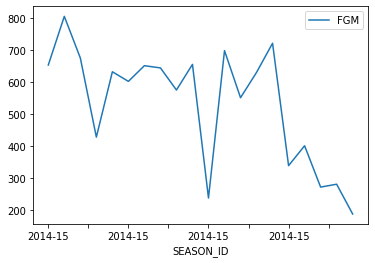

In [10]:
analysis_col = 'FGM'
dynasty.set_index('SEASON_ID').plot(y=analysis_col)
plt.show()